#### Q1. Explain GET and POST methods.
#### Sol:-
GET and POST are two HTTP (Hypertext Transfer Protocol) methods used for communication between a client (typically a web browser) and a server. These methods define how data should be sent to the server and how the server should respond.

##### 1).GET Method:
A).Purpose:-

A).The GET method is used to request data from a specified resource.
Data Transmission: The data is sent as part of the URL in the form of query parameters. For example, in the URL https://example.com/resource?param1=value1&param2=value2, the parameters param1 and param2 are sent as part of the GET request.

B).Visibility:-

The data is visible in the URL, which means it's less secure for transmitting sensitive information.

C).Caching:-

GET requests can be cached by browsers, making them suitable for repeatable and idempotent operations.

In [ ]:
# Example
<form action="/example" method="GET">
    <input type="text" name="username" />
    <input type="submit" value="Submit" />
</form>

##### 2). POST Method:
A).Purpose:-

The POST method is used to submit data to be processed to a specified resource.
Data Transmission: The data is sent in the body of the HTTP request, which is not visible in the URL. This makes it more suitable for transmitting sensitive information, such as passwords.

B).Visibility:-

The data is not visible in the URL, providing a higher level of security compared to GET.

C).Caching:-

POST requests are typically not cached by browsers, making them suitable for operations that may have side effects and are not idempotent.

In [ ]:
# Example
<form action="/example" method="POST">
    <input type="text" name="username" />
    <input type="password" name="password" />
    <input type="submit" value="Submit" />
</form>

##### In summary, the choice between GET and POST depends on the nature of the operation. GET is suitable for retrieving data, while POST is used for submitting data. GET requests are typically bookmarkable and cacheable, while POST requests are more secure for handling sensitive information and operations with side effects.

#### Q2. Why is request used in Flask?
#### Sol:-
In Flask, the request object is a part of the Flask framework and is used to access incoming request data from the client, whether it's data sent in the URL (query parameters for GET requests) or data sent in the body of the request (form data for POST requests). The request object provides a convenient way to interact with this incoming data and extract the information that the client has sent to the server.

The request object simplifies the process of handling incoming data in a Flask application, making it easy to extract information from the client's request and use it within your routes and view functions.

Here are some common use cases for the request object in Flask:

##### A). Accessing Form Data:

When a form is submitted via a POST request, the data from the form is typically sent in the body of the request. The request.form attribute allows you to access this data as a dictionary.

In [ ]:
# Example :-
from flask import Flask, request

app = Flask(__name__)

@app.route('/submit', methods=['POST'])
def submit_form():
    username = request.form.get('username')
    password = request.form.get('password')
    # Process the form data
    return 'Form submitted successfully!'

##### B). Accessing Query Parameters:

When data is sent in the URL as query parameters in a GET request, you can use the request.args attribute to access these parameters.

In [ ]:
# Example :-
from flask import Flask, request

app = Flask(__name__)

@app.route('/search', methods=['GET'])
def search():
    query = request.args.get('query')
    # Perform a search using the query parameter
    return 'Search results for: {}'.format(query)

##### C). Handling File Uploads:
When handling file uploads through a form, the uploaded files can be accessed using the request.files attribute.

In [ ]:
# Example :-
from flask import Flask, request

app = Flask(__name__)

@app.route('/upload', methods=['POST'])
def upload_file():
    uploaded_file = request.files['file']
    # Process the uploaded file
    return 'File uploaded successfully!'

##### D). Accessing Headers:
The request.headers attribute allows you to access the HTTP headers sent by the client.

In [ ]:
# Example :-
from flask import Flask, request

app = Flask(__name__)

@app.route('/user-agent', methods=['GET'])
def user_agent():
    user_agent = request.headers.get('User-Agent')
    return 'User-Agent: {}'.format(user_agent)

#### Q3. Why is redirect() used in Flask.
#### Sol:- 
In Flask, the redirect() function is used to redirect the client to a different URL. It is particularly useful when you want to direct the user to another route or an external URL after processing a request. This can be handy in scenarios such as form submissions, login/logout actions, or any situation where you need to guide the user to a different part of your application or an external resource.

In summary, the redirect() function in Flask is a convenient way to instruct the client's browser to navigate to a different URL, whether it's within your Flask application or an external resource.

Here's a simple example demonstrating the use of redirect() in a Flask route:

In [ ]:
from flask import Flask, redirect, url_for

app = Flask(__name__)

@app.route('/')
def home():
    return 'Welcome to the home page!'

@app.route('/redirect_example')
def redirect_example():
    # Redirect the user to the home page using the 'home' endpoint
    return redirect(url_for('home'))

##### Additionally, you can use redirect() to redirect to external URLs in below example:
This can be beneficial for scenarios where you want to direct the user to a different website or an external resource.

In [ ]:

from flask import Flask, redirect

app = Flask(__name__)

@app.route('/external_redirect')
def external_redirect():
    # Redirect the user to an external URL
    return redirect('https://www.google.com')

#### Q4. What are templates in Flask? Why is the render_template() function used?
#### Sol:-
In Flask, templates are used to separate the structure and layout of the HTML content from the Python code that generates it. Templates allow you to create dynamic web pages by embedding placeholders for dynamic content that will be filled in at runtime. This follows the concept of the Model-View-Controller (MVC) pattern, where templates serve as the "View" component.

Flask uses the Jinja2 template engine, and templates are typically stored in the "templates" folder within the Flask project directory. Templates can include placeholders, known as template variables, and control structures such as loops and conditionals. At runtime, Flask replaces these placeholders with actual data before sending the HTML content to the client.

The render_template() function in Flask is used to render HTML templates. It takes the name of the template file as an argument, along with any additional data that needs to be passed to the template. The function then renders the template with the provided data and returns the resulting HTML content to be sent to the client's browser.

In [ ]:
# Create a template file named index.html in the "templates" folder:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>{{ title }}</title>
</head>
<body>
    <h1>{{ greeting }}</h1>
    <p>{{ content }}</p>
</body>
</html>

In [ ]:
 # Use render_template() in a Flask route to render the template:
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def home_page():
    return render_template('index.html')

@app.route('/msg')
def home():
    return render_template('index.html', title='Welcome to My Website', greeting='Hello!', content='This is a Flask web application.')

##### 
By using templates and render_template(), you can maintain a clean separation between the presentation (HTML structure) and the application logic in your Flask routes, making your code more organized and maintainable.

Below is the attached screenshot :- 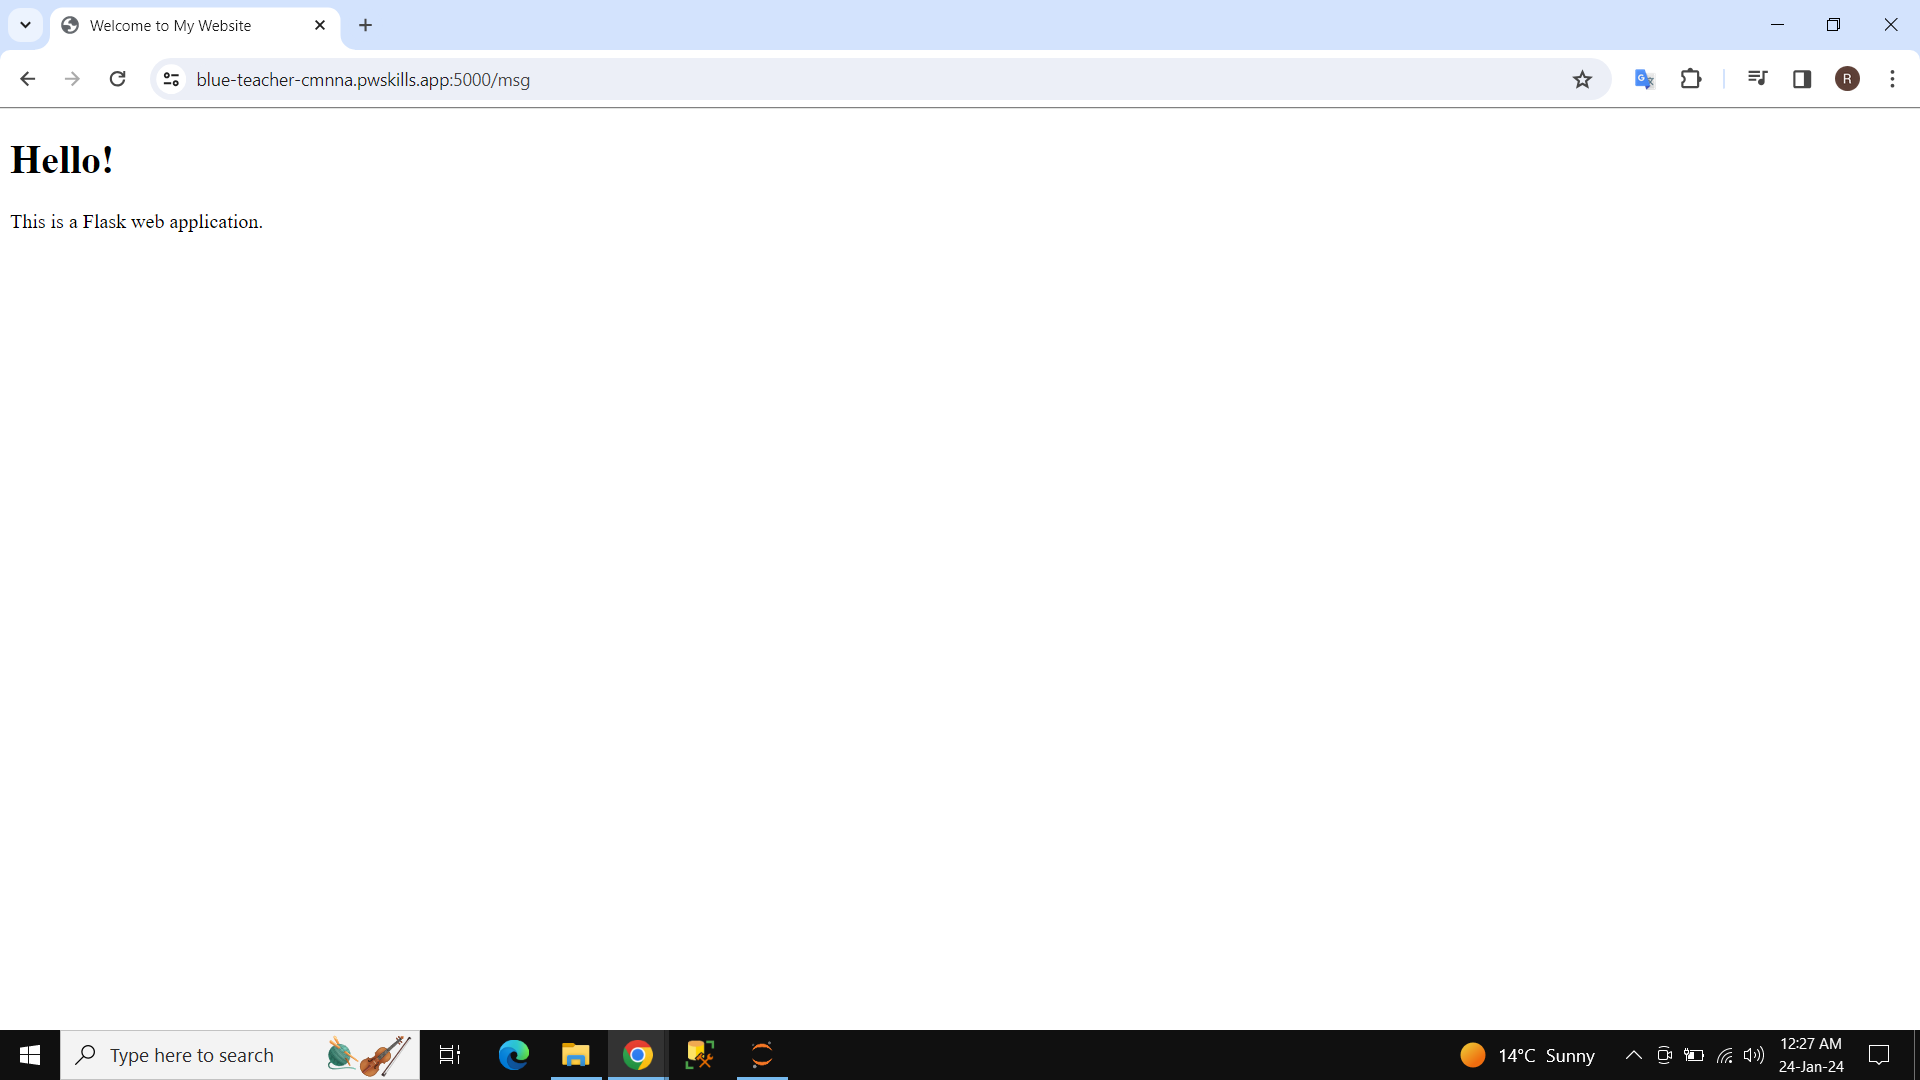

#### Q5. Create a simple API. Use Postman to test it. Attach the screenshot of the output in the Jupyter Notebook. 
#### Sol :-

In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/api/greet', methods=['POST'])
def greet():
    data = request.get_json()
    name = data.get('name', 'Guest')
    greeting = f"Hello {name}, Welcome to the world of API!"
    return jsonify({'Greeting': greeting})

if __name__=="__main__":
    app.run(host="0.0.0.0")

##### 
Below is the screenshot :- 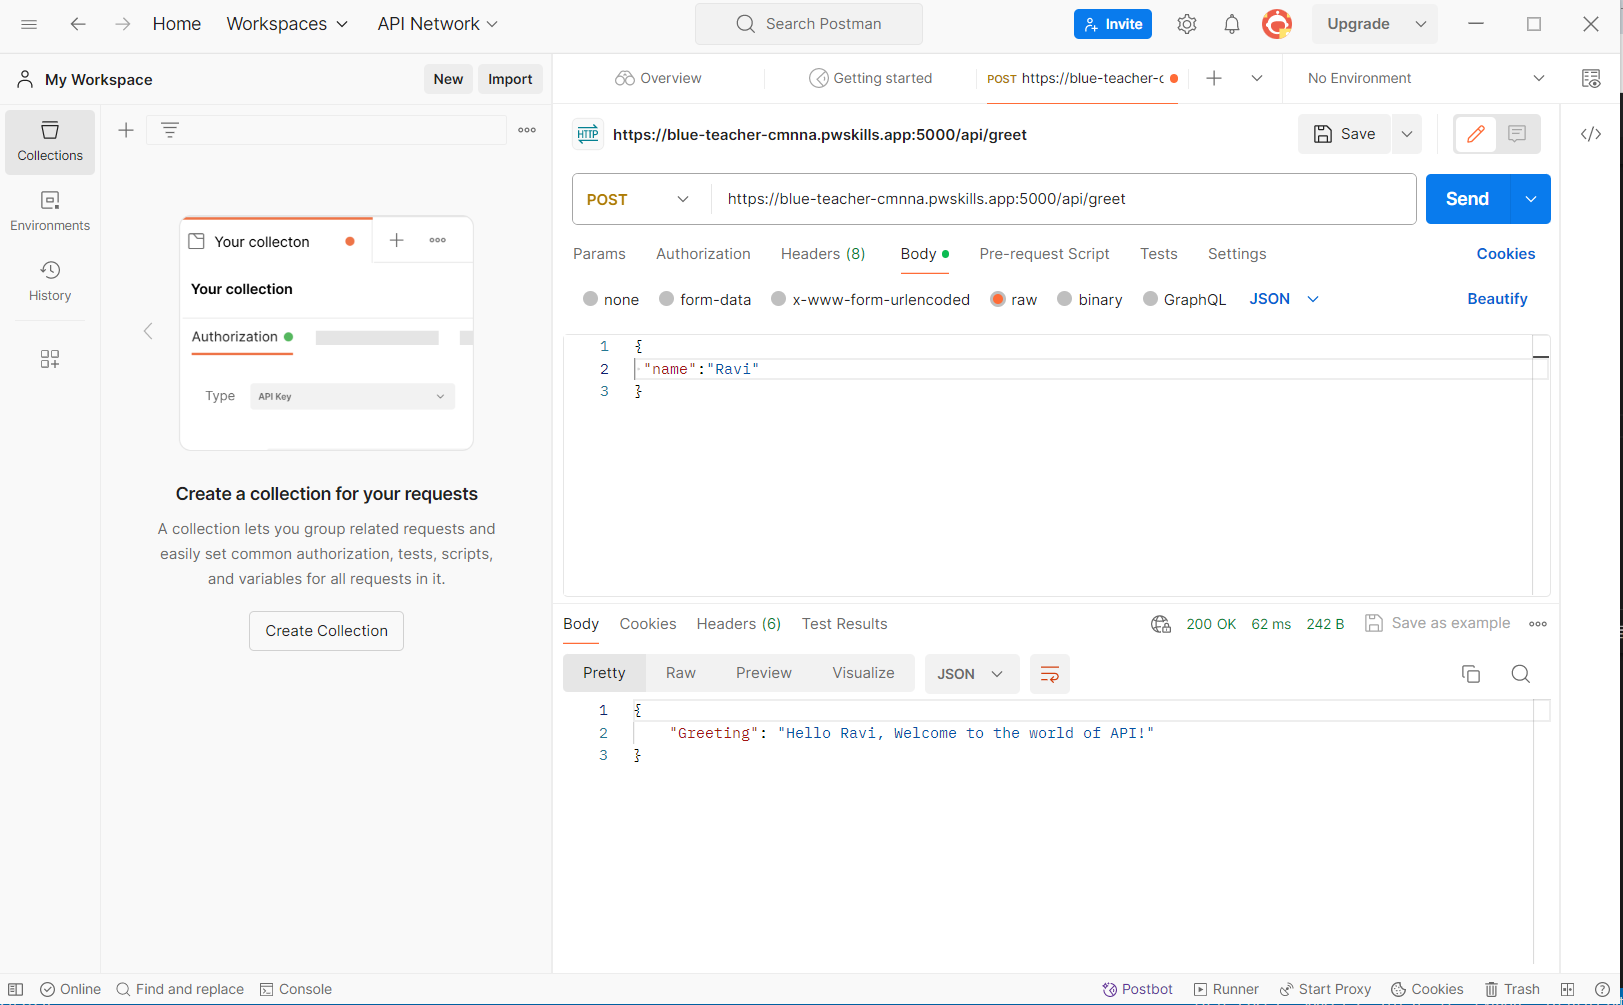